In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

In [119]:
snake = pd.read_csv('training.csv')
prev_snake = pd.read_csv('la5_700.csv')
snake['Efficiency'] = snake['Score'] / snake['Steps']
prev_snake['Efficiency'] = prev_snake['Score'] / prev_snake['Steps']
snake.head()

,Game,Score,Steps,Epsilon,Efficiency
0,1,0,25,159,0.000000
1,2,0,154,158,0.000000
2,3,0,51,157,0.000000
3,4,1,67,156,0.014925
4,5,0,54,155,0.000000


In [120]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

Max Score (current): 116


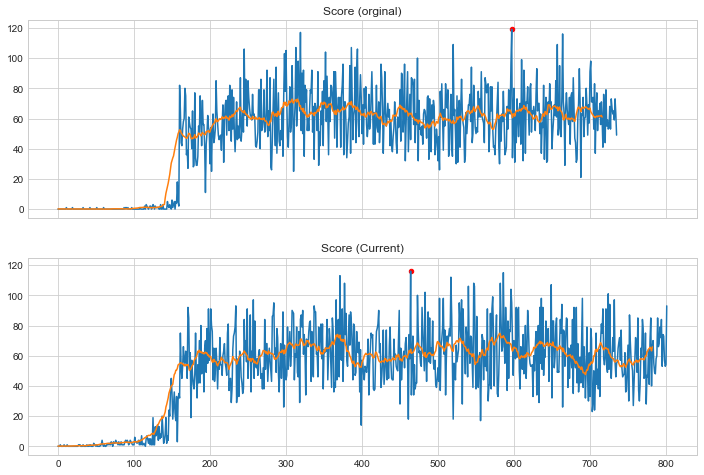

In [121]:
fig, ax = plt.subplots(nrows=2, sharex=True,  sharey=True, figsize=(12,8))
ax[0].plot(prev_snake['Score'])
ax[0].plot(moving_average(prev_snake['Score'], 20))
ax[0].scatter(x=np.argmax(prev_snake['Score']), y=prev_snake['Score'][np.argmax(prev_snake['Score'])], color='red', s=20)
ax[0].set_title('Score (orginal)')

ax[1].plot(snake['Score'])
ax[1].plot(moving_average(snake['Score'], 20))
ax[1].scatter(x=np.argmax(snake['Score']), y=snake['Score'][np.argmax(snake['Score'])], color='red', s=20)
ax[1].set_title('Score (Current)')
max_score = snake['Score'][np.argmax(snake['Score'])]
print(f'Max Score (current): {max_score}')

Text(0.5, 1.0, 'Steps (Current)')

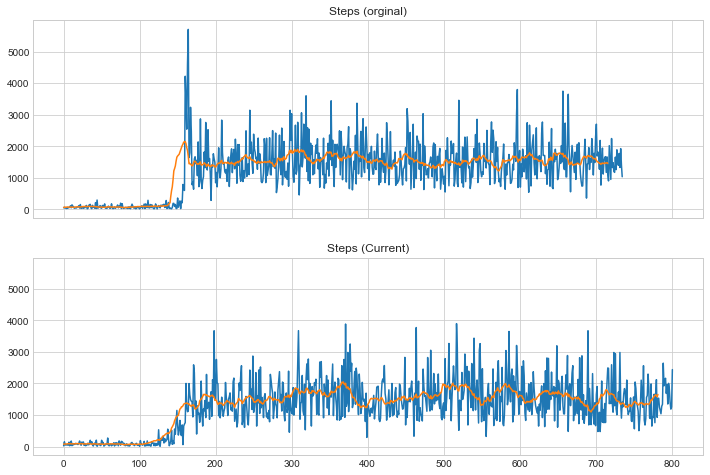

In [122]:
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(12,8))
ax[0].plot(prev_snake['Steps'])
ax[0].plot(moving_average(prev_snake['Steps'], 20))
ax[0].set_title('Steps (orginal)')

ax[1].plot(snake['Steps'])
ax[1].plot(moving_average(snake['Steps'], 20))
ax[1].set_title('Steps (Current)')

Text(0.5, 1.0, 'Efficiency (Current)')

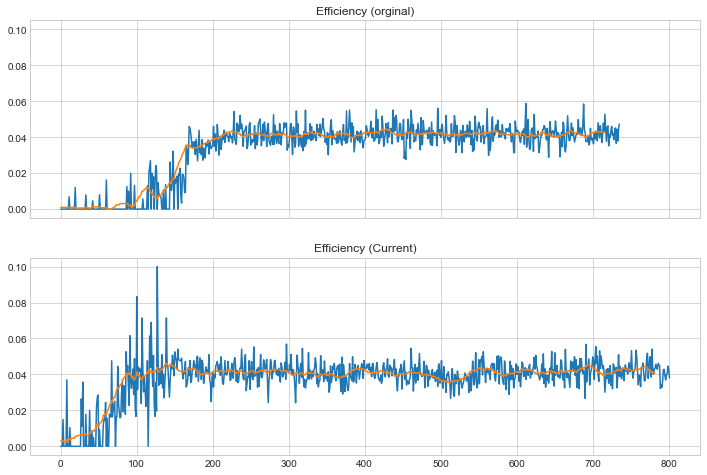

In [123]:
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(12,8))
ax[0].plot(prev_snake['Efficiency'])
ax[0].plot(moving_average(prev_snake['Efficiency'], 20))
ax[0].set_title('Efficiency (orginal)')

ax[1].plot(snake['Efficiency'])
ax[1].plot(moving_average(snake['Efficiency'], 20))
ax[1].set_title('Efficiency (Current)')

In [124]:
snake['model'] = 'Current'
prev_snake['model'] = 'Original'
combined = pd.concat([snake[250:], prev_snake[250:]], ignore_index=True)

In [125]:
combined['model'].unique()

array(['Current', 'Original'], dtype=object)

<AxesSubplot:xlabel='model', ylabel='Score'>

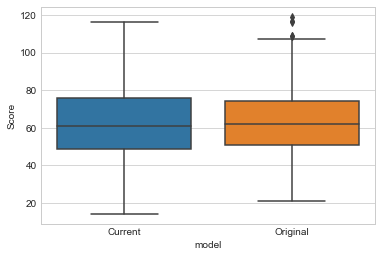

In [126]:
sns.boxplot(y='Score', data=combined, x='model')

<AxesSubplot:xlabel='Score', ylabel='Count'>

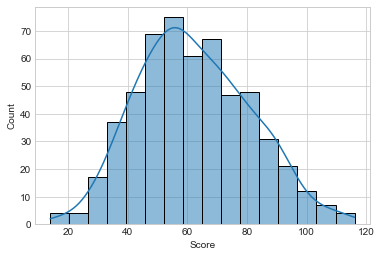

In [127]:
sns.histplot(snake['Score'][250:], kde=True)